In [16]:
#import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:\\Users\\HP\\Desktop\\ML DATASETS\\bank-loan-status-dataset"))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt


['credit_test.csv', 'credit_train.csv']


In [10]:
#import the file
dataframe = pd.read_csv('C:\\Users\\HP\\Desktop\\ML DATASETS\\bank-loan-status-dataset\\credit_train.csv')
pp.ProfileReport(dataframe)

NameError: name 'pp' is not defined

In [18]:
#find type
print(dataframe.dtypes)
# find categorical variables
categorical = [var for var in dataframe.columns if dataframe[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
# find numerical variables
numerical = [var for var in dataframe.columns if dataframe[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# view of categorical variables
print(dataframe[categorical].head())
# view of numerical variables
print(dataframe[numerical].head())

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object
There are 7 categorical variables
There are 12 numerical variables
                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9 

In [19]:
#print first 5 rows
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [21]:
#describe data
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [22]:
#see missing values
dataframe.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [23]:
#credit score must be in the range of 500 to 900
#mean of credit scoe 1076.46
df = dataframe[dataframe['Credit Score']>800]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,nan,6.00,0.00,215308.00,272448.00,0.00,0.00
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.00,Short Term,7120.00,537472.00,10+ years,Rent,Debt Consolidation,5777.90,14.80,nan,4.00,0.00,132468.00,164406.00,0.00,0.00
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.00,Long Term,6610.00,527839.00,10+ years,Rent,Debt Consolidation,14207.63,17.00,48.00,9.00,0.00,254277.00,379918.00,0.00,0.00
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.00,Short Term,7380.00,728726.00,4 years,Rent,major_purchase,10135.36,11.40,nan,8.00,0.00,104633.00,199936.00,0.00,0.00
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.00,Long Term,7370.00,1028774.00,6 years,Home Mortgage,Debt Consolidation,22632.99,19.30,nan,5.00,0.00,474658.00,742720.00,0.00,0.00


In [24]:
#dividing with 10
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [25]:
#describe updated data
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,716.29,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,28.30,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,703.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,722.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,738.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [26]:
#drop  missing vlaues in loan status
dataframe.dropna(subset=['Loan Status'], inplace = True)


In [27]:
#label loan status
le = preprocessing.LabelEncoder()
dataframe['Loan Status'] = le.fit_transform(dataframe['Loan Status'])

In [28]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [29]:
coffvalue = dataframe[dataframe['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = dataframe[dataframe['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")


In [30]:
import seaborn as sns
sns.countplot(dataframe['Loan Status'],label='count')

In [31]:
#term column
print("Value counts for each term: \n",dataframe['Term'].value_counts())
print("Missing data in loan term:",dataframe['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [32]:
#label term column
dataframe['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [33]:
#observe the term
scount = dataframe[dataframe['Term'] == 0]['Term'].count()
lcount = dataframe[dataframe['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


In [34]:
termDF.plot(kind="barh", title="Term of Loans")

In [35]:
import seaborn as sns

In [36]:
sns.countplot(dataframe["Term"])

In [37]:
sns.countplot(dataframe["Term"],hue=dataframe["Loan Status"])
print(dataframe["Term"].value_counts())

0    72208
1    27792
Name: Term, dtype: int64


In [38]:
#0-change off mean
cscoredf = dataframe[dataframe['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [39]:
#1-full paid mean
lscoredf = dataframe[dataframe['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [40]:
dataframe.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [41]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [42]:
dataframe.shape

(100000, 19)

In [43]:
do_nothing = lambda: None

In [44]:
#replace missing values of credit score on bias of term column with mean
dataframe.loc[(dataframe.Term ==0) & (dataframe['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [45]:
dataframe.loc[(dataframe.Term ==1) & (dataframe['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [46]:
dataframe.shape

(100000, 19)

In [47]:
dataframe['Credit Score'].isna().sum()

0

In [48]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)


In [49]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)


In [50]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)


In [51]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)


In [52]:
dataframe['Credit Score'] = dataframe['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)


In [53]:
dataframe['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [54]:
dataframe.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [55]:
dataframe = dataframe.join(pd.get_dummies(dataframe['Credit Score'], drop_first = True))


In [56]:
dataframe.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Good',
       'Very Good'],
      dtype='object')

In [57]:
dataframe.rename(columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'}, inplace=True)
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,...,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,nan,10+ years,Home Mortgage,Debt Consolidation,...,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,Very Good,2231892.00,8 years,Own Home,Debt Consolidation,...,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,Good,806949.00,3 years,Own Home,Debt Consolidation,...,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,Good,nan,5 years,Rent,Debt Consolidation,...,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0


In [58]:
dataframe.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Good',
       'Credit Very Good'],
      dtype='object')

In [59]:
dataframe=dataframe.drop(columns=['Credit Score'], axis=1)
dataframe.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Good',
       'Credit Very Good'],
      dtype='object')

In [60]:
dataframe.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Credit Good',
       'Credit Very Good'],
      dtype='object')

In [61]:
dataframe.shape

(100000, 20)

In [62]:
print("There are",dataframe['Annual Income'].isna().sum(), "Missing Annual Income Values.")


There are 19154 Missing Annual Income Values.


In [63]:

dataframe['Annual Income'].fillna(dataframe['Annual Income'].mean(), inplace=True)
dataframe.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Good,Credit Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.00,1,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.00,0,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00,1,0


In [64]:
dataframe.shape

(100000, 20)

In [65]:
dataframe['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [66]:
dataframe['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

In [67]:
sns.countplot(dataframe['Purpose'])

In [68]:
dataframe.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)


In [69]:
dataframe.drop(labels=['Months since last delinquent'], axis=1, inplace=True)


In [70]:
dataframe.shape

(100000, 17)

In [71]:
sns.countplot(dataframe["Tax Liens"])

In [72]:
sns.scatterplot('Tax Liens','Loan Status',data=dataframe)

In [73]:
dataframe.drop(labels=['Tax Liens'], axis=1, inplace=True)

In [74]:
dataframe.shape

(100000, 16)

In [75]:
dataframe.dropna(subset=['Bankruptcies'], inplace = True)

In [76]:
dataframe.dropna(subset=['Maximum Open Credit'], inplace = True)

In [77]:
dataframe.shape

(99794, 16)

In [78]:
sns.countplot(dataframe["Years in current job"])

In [79]:
dataframe.shape

(99794, 16)

In [80]:
dataframe["Years in current job"].fillna('10+ years', inplace=True) # fill with '10+ years'.

In [81]:
dataframe["Years in current job"].value_counts().sort_values(ascending=True).plot(kind='barh', title="Years in current job", figsize=(15,10))

In [82]:
dataframe.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Credit Good                  0
Credit Very Good             0
dtype: int64

In [83]:
#pairplot
sns.pairplot(dataframe)

In [84]:
#plot correlation [plot]
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataframe.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently 

In [85]:
dataframe.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Credit Good',
       'Credit Very Good'],
      dtype='object')

In [86]:
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Credit Good,Credit Very Good
0,1,445412.00,0,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,1,0
1,1,262328.00,0,1378276.56,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,1,0
2,1,99999999.00,0,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,0,1
3,1,347666.00,1,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,1,0
4,1,176220.00,0,1378276.56,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,1,0


In [87]:
dataframe.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Credit Good',
       'Credit Very Good'],
      dtype='object')

In [88]:
dataframe= pd.get_dummies(dataframe, columns=['Years in current job', 'Home Ownership','Purpose'], drop_first=True)
dataframe.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412.00,0,1167493.00,5214.74,17.20,6.00,1.00,228190.00,416746.00,...,0,0,0,0,0,0,0,0,0,0
1,1,262328.00,0,1378276.56,33295.98,21.10,35.00,0.00,229976.00,850784.00,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999.00,0,2231892.00,29200.53,14.90,18.00,1.00,297996.00,750090.00,...,0,0,0,0,0,0,0,0,0,0
3,1,347666.00,1,806949.00,8741.90,12.00,9.00,0.00,256329.00,386958.00,...,0,0,0,0,0,0,0,0,0,0
4,1,176220.00,0,1378276.56,20639.70,6.10,15.00,0.00,253460.00,427174.00,...,0,0,0,0,0,0,0,0,0,0


In [89]:
dataframe.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Credit Good',
       'Credit Very Good', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Pur

In [90]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = dataframe['Loan Status']
    X = dataframe.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    X = X.drop(columns = drops)
    
    # Add the score back in to the data
    X['Loan Status'] = y
               
    return x


In [91]:
# Remove the collinear features above a specified correlation coefficient
dataframe = remove_collinear_features(dataframe, 0.6);
dataframe.shape

(99794, 41)

In [92]:
y=dataframe['Loan Status']
X=dataframe.drop(columns=['Loan Status'],axis=1)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_train)
y_pred1=classifier.predict(X_test)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.9921981246868513
[[15361   439]
 [  106 53949]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15800
           1       0.99      1.00      0.99     54055

   micro avg       0.99      0.99      0.99     69855
   macro avg       0.99      0.99      0.99     69855
weighted avg       0.99      0.99      0.99     69855



In [96]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.7567721032766626
[[ 1418  5369]
 [ 1913 21239]]
              precision    recall  f1-score   support

           0       0.43      0.21      0.28      6787
           1       0.80      0.92      0.85     23152

   micro avg       0.76      0.76      0.76     29939
   macro avg       0.61      0.56      0.57     29939
weighted avg       0.71      0.76      0.72     29939



In [453]:
def plot_feature_importances(importances, features):
    # get the importance rating of each feature and sort it
    indices = np.argsort(importances)

    # make a plot with the feature importance
    plt.figure(figsize=(12,14), dpi= 80, facecolor='w', edgecolor='k')
    plt.grid()
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], height=0.8, color='mediumvioletred', align='center')
    plt.axvline(x=0.03)
    plt.yticks(range(len(indices)), list(X_train))
    plt.xlabel('Relative Importance')
    plt.show()
   

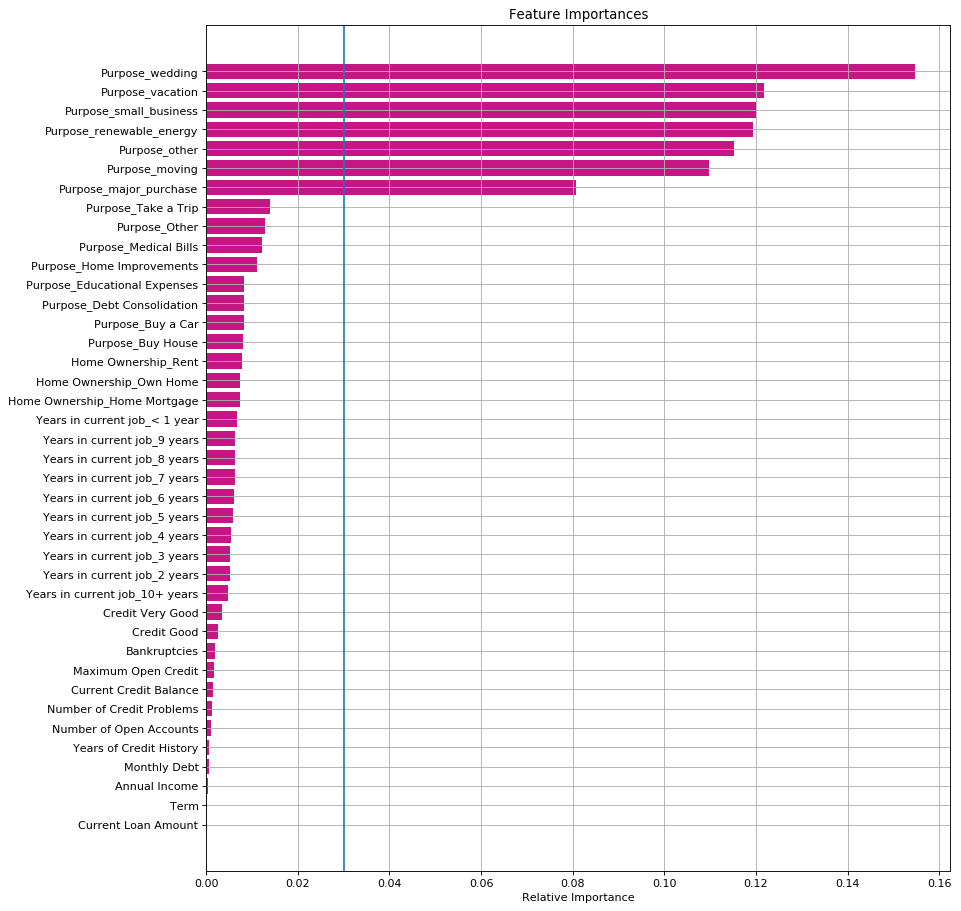

In [454]:
 plot_feature_importances(classifier.feature_importances_, X_train)

In [455]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Purpose_wedding'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.002395687678032648  with a P-value of P = 0.4491733742355517


In [456]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Purpose_Buy House'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.0039226123954891725  with a P-value of P = 0.21528999431471277


In [457]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Purpose_Buy a Car'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.018054953939252567  with a P-value of P = 1.1703672779671396e-08


In [458]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Purpose_Debt Consolidation'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.007965822967786085  with a P-value of P = 0.011855149692497086


In [459]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Current Loan Amount'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.1945713743069618  with a P-value of P = 0.0


In [460]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Term'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.11088465536834546  with a P-value of P = 1.8604823847312633e-270


In [461]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataframe['Annual Income'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.04670302248388065  with a P-value of P = 2.5966726114269977e-49


In [462]:
##### STEPWISE ELEMINATION #######

import statsmodels.api as sm


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  Current Loan Amount            with p-value 0.0
Add  Term                           with p-value 8.76866e-227
Add  Home Ownership_Home Mortgage   with p-value 2.53478e-84
Add  Annual Income                  with p-value 1.46792e-45
Add  Credit Very Good               with p-value 1.30901e-34
Add  Credit Good                    with p-value 2.77703e-19
Add  Purpose_small_business         with p-value 9.34043e-13
Add  Monthly Debt                   with p-value 8.79261e-12
Add  Home Ownership_Rent            with p-value 2.05649e-08
Add  Purpose_Other                  with p-value 4.20186e-07
Add  Purpose_Buy a Car              with p-value 1.92528e-06
Add  Years in current job_3 years   with p-value 0.000382039
Add  Number of Open Accounts        with p-value 0.00228408
Add  Years of Credit History        with p-value 0.00950332
resulting features:
['Current Loan Amount', 'Term', 'Home Ownership_Home Mortgage', 'Annual Income', 'Credit Very Good', 'Credit Good', 'Purpose_small_busi

In [463]:
X=dataframe[['Current Loan Amount', 'Term', 'Home Ownership_Home Mortgage', 'Annual Income', 'Credit Very Good', 'Credit Good', 'Purpose_small_business', 'Monthly Debt', 'Home Ownership_Rent', 'Purpose_Other', 'Purpose_Buy a Car', 'Years in current job_3 years', 'Number of Open Accounts', 'Years of Credit History']]

In [464]:
X.columns

Index(['Current Loan Amount', 'Term', 'Home Ownership_Home Mortgage',
       'Annual Income', 'Credit Very Good', 'Credit Good',
       'Purpose_small_business', 'Monthly Debt', 'Home Ownership_Rent',
       'Purpose_Other', 'Purpose_Buy a Car', 'Years in current job_3 years',
       'Number of Open Accounts', 'Years of Credit History'],
      dtype='object')

In [465]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [466]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_train)
y_pred1=classifier.predict(X_test)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [467]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))

0.9917829790279865
[[15372   428]
 [  146 53909]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15800
           1       0.99      1.00      0.99     54055

   micro avg       0.99      0.99      0.99     69855
   macro avg       0.99      0.99      0.99     69855
weighted avg       0.99      0.99      0.99     69855



In [468]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.748588797221016
[[ 1489  5298]
 [ 2229 20923]]
              precision    recall  f1-score   support

           0       0.40      0.22      0.28      6787
           1       0.80      0.90      0.85     23152

   micro avg       0.75      0.75      0.75     29939
   macro avg       0.60      0.56      0.57     29939
weighted avg       0.71      0.75      0.72     29939



In [1]:
data= "Sandeep"
data[::-1]

'peednaS'

In [2]:
data="sandfeep is a good boy"
data[::-1]

'yob doog a si peefdnas'

In [3]:
import pandas as pd
names = '''\
John Snow
Black, Jack
Jim Bean/
Draper, Don
'''
df = pd.DataFrame({'Name': names.splitlines()})
#           Name
# 0    John Snow
# 1  Black, Jack
# 2    Jim Bean/
# 3  Draper, Don

df['Name'] = df['Name'].str.replace(r'(.+),\s+(.+)', r'\2 \1')

In [4]:
df['Name']

0     John Snow
1    Jack Black
2     Jim Bean/
3    Don Draper
Name: Name, dtype: object

In [5]:
d = {'name':['Bran Stark','Jon Snow','Rhaegar Targaryen']}
df = pd.DataFrame(data=d)
df['new name'] = df['name'].apply(lambda x : ', '.join(reversed(x.split(' '))))
print(df['new name'])


0           Stark, Bran
1             Snow, Jon
2    Targaryen, Rhaegar
Name: new name, dtype: object


In [6]:
# Program to multiply two matrices using nested loops

# 3x3 matrix
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]
# 3x4 matrix
Y = [[5,8,1,2],
    [6,7,3,0],
    [4,5,9,1]]
# result is 3x4
result = [[0,0,0,0],
         [0,0,0,0],
         [0,0,0,0]]

# iterate through rows of X
for i in range(len(X)):
   # iterate through columns of Y
   for j in range(len(Y[0])):
       # iterate through rows of Y
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]

for r in result:
   print(r)

[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]


In [8]:
import seaborn as sns

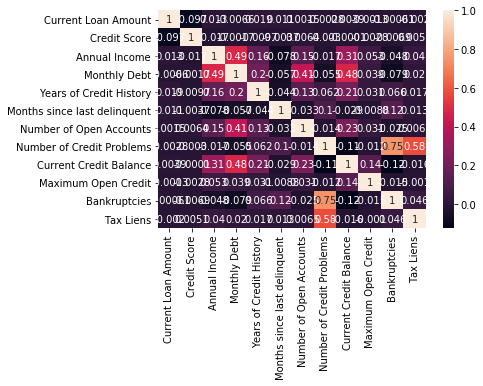

In [14]:
sns.heatmap(dataframe.corr(),annot=True)

In [15]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 8.3456590e-04 -4.2630453e-03 -3.1030169e-03 -3.2115355e-03
  1.8925297e-03 -4.9721263e-03  4.4724543e-04  1.7681152e-03
 -9.2848885e-04 -1.6926824e-05 -2.5146070e-04  1.7189755e-03
 -2.3118528e-03  1.2724835e-03 -1.1085331e-03 -3.7690559e-03
  4.3238946e-03 -3.0526865e-04  3.7636352e-03  4.6677659e-03
 -6.9161213e-04  1.5997423e-03  4.1154753e-03 -1.2461274e-03
  5.2663067e-04  2.9302794e-03 -4.7027707e-04 -3.4838328e-03
  2.5111437e-03  4.8713591e-03  4.7248229e-03  1.2013384e-03
 -1.7701491e-03  2.4399646e-03  2.5082731e-03  4.8697270e-03
  2.2093724e-03 -3.6385309e-04  4.0929122e-03  4.0960402e-04
 -2.7812556e-03  7.7567116e-04 -1.5908008e-03 -3.7344010e-03
 -1.5185032e-03 -3.1559526e-03 -4.5949272e-03  1.8153901e-03
  4.4005732e-03 -2.3932294e-03 -8.9097273e-05  3.3596359e-04
 -5.3098978e-04 -3.5472678e-03  3.3883657e-0

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


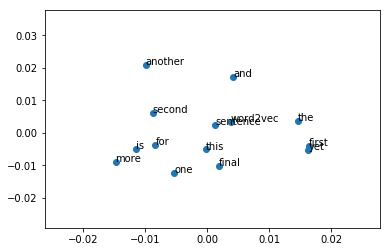

In [16]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()